In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
df1=pd.read_csv('1 jul 2018 - 30 jun 2019.csv',skiprows=[0,2],header=1,skipfooter=1)
df1

C:\Users\SR-19\AppData\Local\Temp\ipykernel_7760\4130479678.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df1=pd.read_csv('1 jul 2018 - 30 jun 2019.csv',skiprows=[0,2],header=1,skipfooter=1)


SI.No.     Consumer Name Reading DateTime  Temperature(C)  VPV1(V)  \
0           1  Dr. Kamal K. Kar  6/30/2019 23:55             4.6      0.0   
1           2  Dr. Kamal K. Kar  6/30/2019 23:47             4.6      0.0   
2           3  Dr. Kamal K. Kar  6/30/2019 23:39             4.6      0.0   
3           4  Dr. Kamal K. Kar  6/30/2019 23:31             4.6      0.0   
4           5  Dr. Kamal K. Kar  6/30/2019 23:24             4.6      0.0   
...       ...               ...              ...             ...      ...   
30593   30594  Dr. Kamal K. Kar   7/6/2018 16:02            51.3    270.4   
30594   30595  Dr. Kamal K. Kar   7/6/2018 15:55            52.8    288.4   
30595   30596  Dr. Kamal K. Kar   7/6/2018 15:48            54.0    268.8   
30596   30597  Dr. Kamal K. Kar   7/6/2018 15:41            54.6    267.2   
30597   30598  Dr. Kamal K. Kar   7/6/2018 15:34            55.8    237.8   

       VPV2(V)  Reserved 1  IPV1(A)  IPV2(A)  Reserved 2  ...  \
0          0.0           0      0.0      0.0           0  ...   
1          0.0           0      0.0      0.0           0  ...   
2          0.0           0      0.0      0.0           0  ...   
3          0.0           0      0.0      0.0           0  ...   
4          0.0           0      0.0      0.0           0  ...   
...        ...         ...      ...      ...         ...  ...   
30593    264.0           0      1.8      1.9           0  ...   
30594    270.8           0      2.2      3.5           0  ...   
30595    256.8           0      1.6      1.7           0  ...   
30596    264.8           0      1.9      1.9           0  ...   
30597    234.4           0      4.2      4.3           0  ...   

       Third Error Time H  Third Error Time L  Fourth Error H  Fourth Error L  \
0                       0                   0               0               0   
1                       0                   0               0               0   
2                       0                   0               0               0   
3                       0                   0               0               0   
4                       0                   0               0               0   
...                   ...                 ...             ...             ...   
30593                   0                   0               0               0   
30594                   0                   0               0               0   
30595                   0                   0               0               0   
30596                   0                   0               0               0   
30597                   0                   0               0               0   

       Fourth Error Time H  Fourth Error Time L  Fifth Error H  Fifth Error L  \
0                        0                    0              0              0   
1                        0                    0              0              0   
2                        0                    0              0              0   
3                        0                    0              0              0   
4                        0                    0              0              0   
...                    ...                  ...            ...            ...   
30593                    0                    0              0              0   
30594                    0                    0              0              0   
30595                    0                    0              0              0   
30596                    0                    0              0              0   
30597                    0                    0              0              0   

       Fifth Error Time H  Fifth Error Time L  
0                       0                   0  
1                       0                   0  
2                       0                   0  
3                       0                   0  
4                       0                   0  
...                   ...                 ...  
30593              

In [2]:
df1.shape

(30598, 60)

In [3]:
df1['Reading DateTime']=pd.to_datetime(df1['Reading DateTime'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30598 entries, 0 to 30597
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SI.No.                    30598 non-null  int64         
 1   Consumer Name             30598 non-null  object        
 2   Reading DateTime          30598 non-null  datetime64[ns]
 3   Temperature(C)            30598 non-null  float64       
 4   VPV1(V)                   30598 non-null  float64       
 5   VPV2(V)                   30598 non-null  float64       
 6   Reserved 1                30598 non-null  int64         
 7   IPV1(A)                   30598 non-null  float64       
 8   IPV2(A)                   30598 non-null  float64       
 9   Reserved 2                30598 non-null  int64         
 10  IAC(A)                    30598 non-null  float64       
 11  CUR AC S PH               30598 non-null  int64         
 12  CUR AC T PH       

In [4]:
df1.columns.to_list()

['SI.No.',
 'Consumer Name',
 'Reading DateTime',
 'Temperature(C)',
 'VPV1(V)',
 'VPV2(V)',
 'Reserved 1',
 'IPV1(A)',
 'IPV2(A)',
 'Reserved 2',
 'IAC(A)',
 'CUR AC S PH',
 'CUR AC T PH',
 'VAC(V)',
 'VOL AC S PH',
 'VOL AC T PH',
 'PPV1(W)',
 'PPV2(W)',
 'PDC(W)',
 'FREQ(Hz)',
 'PAC(W)',
 'Power AC S PH',
 'Power AC T PH',
 'Reserved 3',
 'Reserved 4',
 'E-TODAY(kWh)',
 'Energy Total H',
 'Energy Total L',
 'E-Total(MWh)',
 'Operation Hour Total H',
 'Operation Hour Total L',
 'Operation Mode',
 'GridVOL FaultValue',
 'GridFreq FaultValue',
 'GridImpedance FaultValue',
 'Temperature FaultValue',
 'PV FaultValue',
 'GFCI FaultValue',
 'Error Message H',
 'Error Message L',
 'First Error H',
 'First Error L',
 'First Error Time H',
 'First Error Time L',
 'Second Error H',
 'Second Error L',
 'Second Error Time H',
 'Second Error Time L',
 'Third Error H',
 'Third Error L',
 'Third Error Time H',
 'Third Error Time L',
 'Fourth Error H',
 'Fourth Error L',
 'Fourth Error Time H',
 'Fo

In [5]:
set(df1['E-TODAY(kWh)'])

{0.0,
 0.5,
 0.25,
 1.25,
 0.75,
 5.5,
 6.66,
 6.5,
 7.75,
 9.91,
 1.5,
 11.86,
 12.82,
 6.75,
 7.25,
 15.84,
 16.98,
 17.92,
 18.24,
 18.09,
 18.01,
 18.39,
 18.17,
 18.44,
 18.3,
 18.7,
 18.69,
 18.68,
 21.88,
 21.87,
 21.63,
 23.68,
 23.22,
 5.75,
 5.25,
 26.12,
 7.0,
 1.75,
 1.0,
 7.5,
 6.25,
 8.0,
 8.25,
 8.5,
 8.75,
 9.75,
 9.25,
 9.0,
 9.5,
 10.0,
 10.5,
 10.75,
 10.25,
 2.5,
 11.0,
 2.0,
 2.25,
 11.75,
 12.5,
 12.0,
 12.25,
 11.25,
 2.75,
 13.5,
 13.25,
 13.0,
 13.75,
 12.75,
 14.0,
 14.5,
 14.25,
 14.75,
 15.0,
 15.5,
 15.25,
 15.75,
 16.5,
 3.75,
 3.0,
 16.75,
 4.22,
 17.5,
 17.25,
 3.25,
 17.75,
 5.47,
 18.0,
 18.75,
 18.25,
 18.5,
 6.47,
 19.25,
 19.0,
 6.22,
 19.75,
 7.22,
 20.25,
 20.5,
 20.75,
 20.0,
 7.97,
 21.75,
 4.25,
 4.0,
 21.0,
 21.5,
 22.25,
 4.75,
 22.75,
 22.5,
 22.0,
 23.0,
 23.75,
 23.25,
 23.5,
 24.25,
 24.5,
 24.0,
 24.75,
 25.5,
 25.25,
 25.75,
 25.0,
 5.0,
 26.75,
 26.0,
 26.5,
 6.0,
 8.69,
 8.44,
 9.69,
 9.19,
 9.94,
 9.44,
 10.44,
 10.69,
 11.69,
 11.19

In [6]:
df1.isnull().sum()

SI.No.                      0
Consumer Name               0
Reading DateTime            0
Temperature(C)              0
VPV1(V)                     0
VPV2(V)                     0
Reserved 1                  0
IPV1(A)                     0
IPV2(A)                     0
Reserved 2                  0
IAC(A)                      0
CUR AC S PH                 0
CUR AC T PH                 0
VAC(V)                      0
VOL AC S PH                 0
VOL AC T PH                 0
PPV1(W)                     0
PPV2(W)                     0
PDC(W)                      0
FREQ(Hz)                    0
PAC(W)                      0
Power AC S PH               0
Power AC T PH               0
Reserved 3                  0
Reserved 4                  0
E-TODAY(kWh)                0
Energy Total H              0
Energy Total L              0
E-Total(MWh)                0
Operation Hour Total H      0
Operation Hour Total L      0
Operation Mode              0
GridVOL FaultValue          0
GridFreq F

In [7]:
df1.duplicated().sum()

0

In [8]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [325]:
from pandas_profiling import ProfileReport

In [12]:
prof1=ProfileReport(df1,title='EDA of df1 BY PANDAS PROFILING REPORT',explorative=True)

In [13]:
prof1.to_file(output_file="EDA df1.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df1.describe()

SI.No.  Temperature(C)       VPV1(V)       VPV2(V)  Reserved 1  \
count  30598.000000    30598.000000  30598.000000  30598.000000     30598.0   
mean   15299.500000       28.606808    149.809184    149.346872         0.0   
std     8833.026105       24.160421    137.260335    136.623617         0.0   
min        1.000000        0.000000      0.000000      0.000000         0.0   
25%     7650.250000        4.600000      0.000000      0.000000         0.0   
50%    15299.500000       32.500000    248.800000    252.200000         0.0   
75%    22948.750000       48.200000    277.000000    274.400000         0.0   
max    30598.000000      250.000000    351.400000    350.400000         0.0   

            IPV1(A)       IPV2(A)  Reserved 2        IAC(A)  CUR AC S PH  ...  \
count  30598.000000  30598.000000     30598.0  30598.000000      30598.0  ...   
mean       1.762929      1.859782         0.0      3.748974          0.0  ...   
std        2.561217      2.635201         0.0      5.225881          0.0  ...   
min        0.000000      0.000000         0.0      0.000000          0.0  ...   
25%        0.000000      0.000000         0.0      0.000000          0.0  ...   
50%        0.100000      0.200000         0.0      0.900000          0.0  ...   
75%        3.000000      3.400000         0.0      6.600000          0.0  ...   
max       10.800000     10.000000         0.0     23.500000          0.0  ...   

       Third Error Time H  Third Error Time L  Fourth Error H  Fourth Error L  \
count             30598.0             30598.0         30598.0         30598.0   
mean                  0.0                 0.0             0.0             0.0   
std                   0.0                 0.0             0.0             0.0   
min                   0.0                 0.0             0.0             0.0   
25%                   0.0                 0.0             0.0             0.0   
50%                   0.0                 0.0             0.0             0.0   
75%                   0.0                 0.0             0.0             0.0   
max                   0.0                 0.0             0.0             0.0   

       Fourth Error Time H  Fourth Error Time L  Fifth Error H  Fifth Error L  \
count              30598.0              30598.0        30598.0        30598.0   
mean                   0.0                  0.0            0.0            0.0   
std                    0.0                  0.0            0.0            0.0   
min                    0.0                  0.0            0.0            0.0   
25%                    0.0                  0.0            0.0            0.0   
50%                    0.0                  0.0            0.0            0.0   
75%                    0.0                  0.0            0.0            0.0   
max                    0.0                  0.0            0.0            0.0   

       Fifth Error Time H  Fifth Error Time L  
count             30598.0             30598.0  
mean                  0.0                 0.0  
std                   0.0                 0.0  
min                   0.0                 0.0  
25%                   0.0                 0.0  
50%                   0.0                 0.0  
75%                   0.0                 0.0  
max                   0.0                 0.0  

[8 rows x 58 columns]

In [10]:
df1.corr()['E-TODAY(kWh)']

C:\Users\SR-19\AppData\Local\Temp\ipykernel_7760\3721385090.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()['E-TODAY(kWh)']


SI.No.                     -0.105501
Temperature(C)              0.242106
VPV1(V)                     0.134987
VPV2(V)                     0.137977
Reserved 1                       NaN
IPV1(A)                     0.109037
IPV2(A)                     0.124726
Reserved 2                       NaN
IAC(A)                      0.113497
CUR AC S PH                      NaN
CUR AC T PH                      NaN
VAC(V)                      0.158206
VOL AC S PH                      NaN
VOL AC T PH                      NaN
PPV1(W)                     0.097088
PPV2(W)                     0.116667
PDC(W)                      0.107233
FREQ(Hz)                    0.161605
PAC(W)                      0.109609
Power AC S PH                    NaN
Power AC T PH                    NaN
Reserved 3                       NaN
Reserved 4                       NaN
E-TODAY(kWh)                1.000000
Energy Total H             -0.149797
Energy Total L              0.103946
E-Total(MWh)               -0.132867
O

In [11]:
df1.corr()

C:\Users\SR-19\AppData\Local\Temp\ipykernel_7760\473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


SI.No.  Temperature(C)   VPV1(V)   VPV2(V)  \
SI.No.                    1.000000       -0.116526 -0.008195 -0.014696   
Temperature(C)           -0.116526        1.000000  0.863242  0.868108   
VPV1(V)                  -0.008195        0.863242  1.000000  0.996273   
VPV2(V)                  -0.014696        0.868108  0.996273  1.000000   
Reserved 1                     NaN             NaN       NaN       NaN   
IPV1(A)                  -0.057852        0.799391  0.575971  0.585045   
IPV2(A)                  -0.064797        0.813490  0.595178  0.599154   
Reserved 2                     NaN             NaN       NaN       NaN   
IAC(A)                   -0.061301        0.813250  0.607568  0.613297   
CUR AC S PH                    NaN             NaN       NaN       NaN   
CUR AC T PH                    NaN             NaN       NaN       NaN   
VAC(V)                   -0.037018        0.898885  0.992518  0.994111   
VOL AC S PH                    NaN             NaN       NaN       NaN   
VOL AC T PH                    NaN             NaN       NaN       NaN   
PPV1(W)                  -0.043457        0.797989  0.590992  0.597529   
PPV2(W)                  -0.055145        0.814170  0.608411  0.613485   
PDC(W)                   -0.049485        0.807769  0.600999  0.606805   
FREQ(Hz)                 -0.032623        0.898251  0.992800  0.994346   
PAC(W)                   -0.063331        0.801517  0.591110  0.597076   
Power AC S PH                  NaN             NaN       NaN       NaN   
Power AC T PH                  NaN             NaN       NaN       NaN   
Reserved 3                     NaN             NaN       NaN       NaN   
Reserved 4                     NaN             NaN       NaN       NaN   
E-TODAY(kWh)             -0.105501        0.242106  0.134987  0.137977   
Energy Total H            0.668730       -0.036031  0.022543  0.019745   
Energy Total L           -0.995287        0.120982  0.010064  0.017183   
E-Total(MWh)              0.337055        0.014310  0.032388  0.032401   
Operation Hour Total H         NaN             NaN       NaN       NaN   
Operation Hour Total L   -0.910289        0.083066 -0.013442 -0.007754   
Operation Mode           -0.035327        0.879063  0.939541  0.940827   
GridVOL FaultValue             NaN             NaN       NaN       NaN   
GridFreq FaultValue            NaN             NaN       NaN       NaN   
GridImpedance FaultValue       NaN             NaN       NaN       NaN   
Temperature FaultValue         NaN             NaN       NaN       NaN   
PV FaultValue                  NaN             NaN       NaN       NaN   
GFCI FaultValue                NaN             NaN       NaN       NaN   
Error Message H                NaN             NaN       NaN       NaN   
Error Message L                NaN             NaN       NaN       NaN   
First Error H                  NaN             NaN       NaN       NaN   
First Error L                  NaN             NaN       NaN       NaN   
First Error Time H             NaN             NaN       NaN       NaN   
First Error Time L             NaN             NaN       NaN       NaN   
Second Error H                 NaN             NaN       NaN       NaN   
Second Error L                 NaN             NaN       NaN       NaN   
Second Error Time H            NaN             NaN       NaN       NaN   
Second Error Time L            NaN             NaN       NaN       NaN   
Third Error H                  NaN             NaN       NaN       NaN   
Third Error L                  NaN             NaN       NaN       NaN   
Third Error Time H             NaN             NaN       NaN       NaN   
Third Error Time L             NaN             NaN       NaN       NaN   
Fourth Error H                 NaN             NaN       NaN       NaN   
Fourth Error L                 NaN             NaN       NaN       NaN   
Fourth Error Time H            NaN             NaN       NaN       NaN   
Fourth Error Time L            N

In [12]:
df1.columns

Index(['SI.No.', 'Consumer Name', 'Reading DateTime', 'Temperature(C)',
       'VPV1(V)', 'VPV2(V)', 'Reserved 1', 'IPV1(A)', 'IPV2(A)', 'Reserved 2',
       'IAC(A)', 'CUR AC S PH', 'CUR AC T PH', 'VAC(V)', 'VOL AC S PH',
       'VOL AC T PH', 'PPV1(W)', 'PPV2(W)', 'PDC(W)', 'FREQ(Hz)', 'PAC(W)',
       'Power AC S PH', 'Power AC T PH', 'Reserved 3', 'Reserved 4',
       'E-TODAY(kWh)', 'Energy Total H', 'Energy Total L', 'E-Total(MWh)',
       'Operation Hour Total H', 'Operation Hour Total L', 'Operation Mode',
       'GridVOL FaultValue', 'GridFreq FaultValue', 'GridImpedance FaultValue',
       'Temperature FaultValue', 'PV FaultValue', 'GFCI FaultValue',
       'Error Message H', 'Error Message L', 'First Error H', 'First Error L',
       'First Error Time H', 'First Error Time L', 'Second Error H',
       'Second Error L', 'Second Error Time H', 'Second Error Time L',
       'Third Error H', 'Third Error L', 'Third Error Time H',
       'Third Error Time L', 'Fourth Error H', 'F

In [13]:
df1['SI.No.']

0            1
1            2
2            3
3            4
4            5
         ...  
30593    30594
30594    30595
30595    30596
30596    30597
30597    30598
Name: SI.No., Length: 30598, dtype: int64

In [14]:
df1.drop(columns=['Reading DateTime','SI.No.','Consumer Name','Reserved 1','Reserved 2','CUR AC S PH','CUR AC T PH','VOL AC S PH','VOL AC T PH','Power AC S PH','Power AC T PH','Reserved 3','Reserved 4','Operation Hour Total H','GridVOL FaultValue','GridFreq FaultValue','GridImpedance FaultValue','Temperature FaultValue','PV FaultValue','GFCI FaultValue','Error Message H','Error Message L','First Error H','First Error L','First Error Time H','First Error Time L','Second Error H','Second Error L','Second Error Time H','Second Error Time L','Third Error H','Third Error L','Third Error Time H','Third Error Time L','Fourth Error H','Fourth Error L','Fourth Error Time H','Fourth Error Time L','Fifth Error H','Fifth Error L','Fifth Error Time H','Fifth Error Time L','IPV2(A)','VPV2(V)','IAC(A)','PAC(W)','FREQ(Hz)','PDC(W)','Operation Mode','Energy Total H'],inplace=True)

In [15]:
df1

Temperature(C)  VPV1(V)  IPV1(A)  VAC(V)  PPV1(W)  PPV2(W)  \
0                 4.6      0.0      0.0     0.0     0.00     0.00   
1                 4.6      0.0      0.0     0.0     0.00     0.00   
2                 4.6      0.0      0.0     0.0     0.00     0.00   
3                 4.6      0.0      0.0     0.0     0.00     0.00   
4                 4.6      0.0      0.0     0.0     0.00     0.00   
...               ...      ...      ...     ...      ...      ...   
30593            51.3    270.4      1.8   236.8   486.72   501.60   
30594            52.8    288.4      2.2   235.6   634.48   947.80   
30595            54.0    268.8      1.6   234.8   430.08   436.56   
30596            54.6    267.2      1.9   235.0   507.68   503.12   
30597            55.8    237.8      4.2   235.2   998.76  1007.92   

       E-TODAY(kWh)  Energy Total L  E-Total(MWh)  Operation Hour Total L  
0              0.00          5104.9        5.1049                    5795  
1              0.00          5104.9        5.1049                    5795  
2              0.00          5104.9        5.1049                    5795  
3              0.00          5104.9        5.1049                    5795  
4              0.00          5104.9        5.1049                    5795  
...             ...             ...           ...                     ...  
30593         21.25          1807.3        8.3609                       0  
30594         21.14          1807.2        8.3608                       0  
30595         21.02          1807.1        8.3607                       0  
30596         20.91          1807.0        8.3606                       0  
30597         20.78          1806.8        8.3604                       0  

[30598 rows x 10 columns]

In [16]:
df1.columns

Index(['Temperature(C)', 'VPV1(V)', 'IPV1(A)', 'VAC(V)', 'PPV1(W)', 'PPV2(W)',
       'E-TODAY(kWh)', 'Energy Total L', 'E-Total(MWh)',
       'Operation Hour Total L'],
      dtype='object')

In [17]:
df1.corr()['E-TODAY(kWh)']

Temperature(C)            0.242106
VPV1(V)                   0.134987
IPV1(A)                   0.109037
VAC(V)                    0.158206
PPV1(W)                   0.097088
PPV2(W)                   0.116667
E-TODAY(kWh)              1.000000
Energy Total L            0.103946
E-Total(MWh)             -0.132867
Operation Hour Total L    0.139647
Name: E-TODAY(kWh), dtype: float64

In [18]:
x=df1.drop(columns=['E-TODAY(kWh)'])

In [19]:
y=df1['E-TODAY(kWh)']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
x_train

Temperature(C)  VPV1(V)  IPV1(A)  VAC(V)  PPV1(W)  PPV2(W)  \
26680             4.6      0.0      0.0     0.0     0.00     0.00   
22364             4.6      0.0      0.0     0.0     0.00     0.00   
3704             71.0    249.6      6.4   239.4  1597.44  1619.80   
12522            43.0    282.2      0.8   242.0   225.76   252.72   
24273            29.4    323.6      0.1   242.0    32.36   111.60   
...               ...      ...      ...     ...      ...      ...   
29802            53.7    271.6      2.4   234.8   651.84   669.50   
5390              4.6      0.0      0.0     0.0     0.00     0.00   
860              55.8    267.0      5.3   243.0  1415.10  1456.00   
15795             4.6      0.0      0.0     0.0     0.00     0.00   
23654            42.5    278.2      6.5   243.8  1808.30  1820.00   

       Energy Total L  E-Total(MWh)  Operation Hour Total L  
26680          2121.5        8.6751                       0  
22364          2474.8        2.4748                    3130  
3704           4711.5        4.7115                    5325  
12522          3500.5        3.5005                    4136  
24273          2303.8        2.3038                    2941  
...               ...           ...                     ...  
29802          1884.3        8.4379                       0  
5390           4515.9        4.5159                    5128  
860            5001.6        5.0016                    5690  
15795          3167.6        3.1676                    3801  
23654          2349.9        2.3499                    3003  

[24478 rows x 9 columns]

In [22]:
x_test

Temperature(C)  VPV1(V)  IPV1(A)  VAC(V)  PPV1(W)  PPV2(W)  \
9489             54.5    262.4      6.0   243.2  1574.40  1616.96   
7261             46.5    261.2      0.5   239.0   130.60   159.24   
16606            68.8    255.6      4.6   245.8  1175.76  1213.20   
9645             48.8    280.6      1.1   242.4   308.66   356.98   
27565             4.6      0.0      0.0     0.0     0.00     0.00   
...               ...      ...      ...     ...      ...      ...   
10690             4.6      0.0      0.0     0.0     0.00     0.00   
1034             58.6    265.0      3.6   236.4   954.00   997.88   
7495             59.4    229.2      4.0   237.6   916.80  1104.60   
2270              4.6      0.0      0.0     0.0     0.00     0.00   
696              37.1    280.8      1.0   243.2   280.80   338.64   

       Energy Total L  E-Total(MWh)  Operation Hour Total L  
9489           4050.7        4.0507                    4681  
7261           4300.3        4.3003                    4918  
16606          3087.5        3.0875                    3719  
9645           4044.4        4.0444                    4664  
27565          2065.1        8.6187                       0  
...               ...           ...                     ...  
10690          3688.3        3.6883                    4328  
1034           4985.7        4.9857                    5669  
7495           4277.9        4.2779                    4892  
2270           4867.8        4.8678                    5518  
696            5018.8        5.0188                    5710  

[6120 rows x 9 columns]

In [23]:
y_train

26680     0.00
22364     0.00
3704     13.58
12522    23.97
24273    14.07
         ...  
29802    12.86
5390     22.92
860       4.76
15795     0.00
23654     5.06
Name: E-TODAY(kWh), Length: 24478, dtype: float64

In [24]:
y_test

9489      5.82
7261     20.57
16606    18.30
9645     20.96
27565     8.66
         ...  
10690     0.00
1034     10.27
7495     19.39
2270     21.80
696       0.25
Name: E-TODAY(kWh), Length: 6120, dtype: float64

C:\Users\SR-19\AppData\Local\Temp\ipykernel_8060\2080111843.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


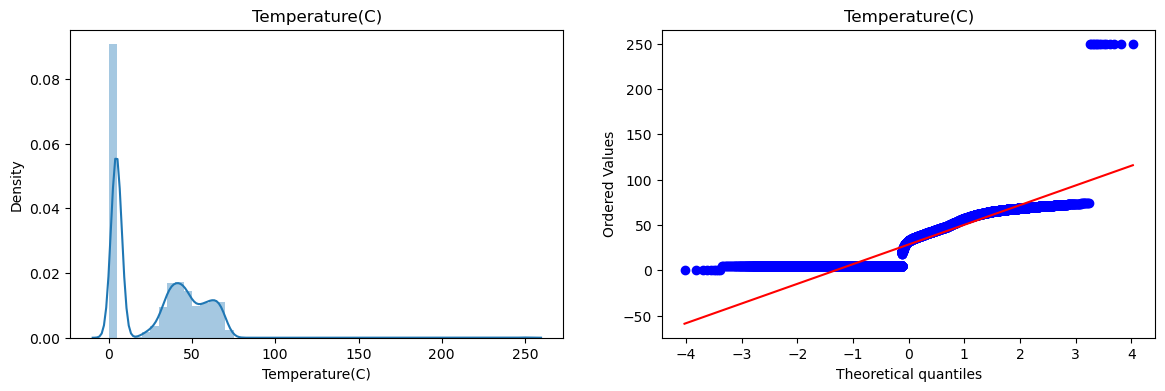

C:\Users\SR-19\AppData\Local\Temp\ipykernel_8060\2080111843.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


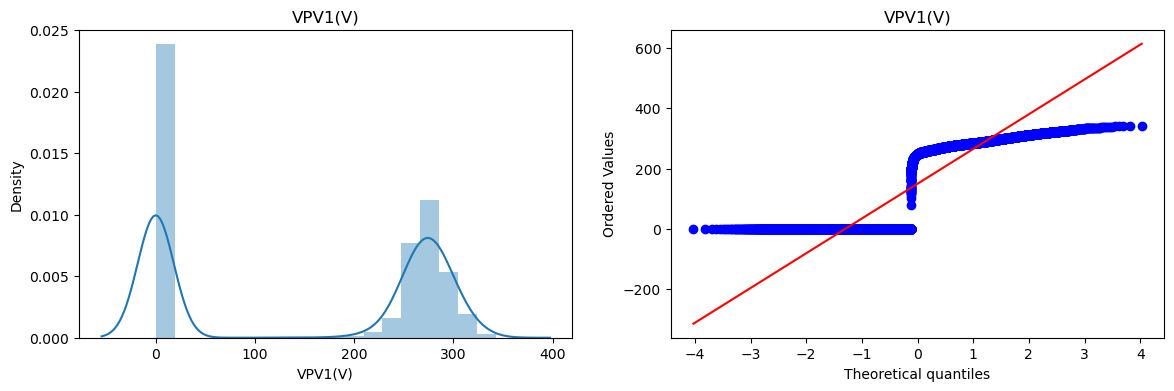

C:\Users\SR-19\AppData\Local\Temp\ipykernel_8060\2080111843.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


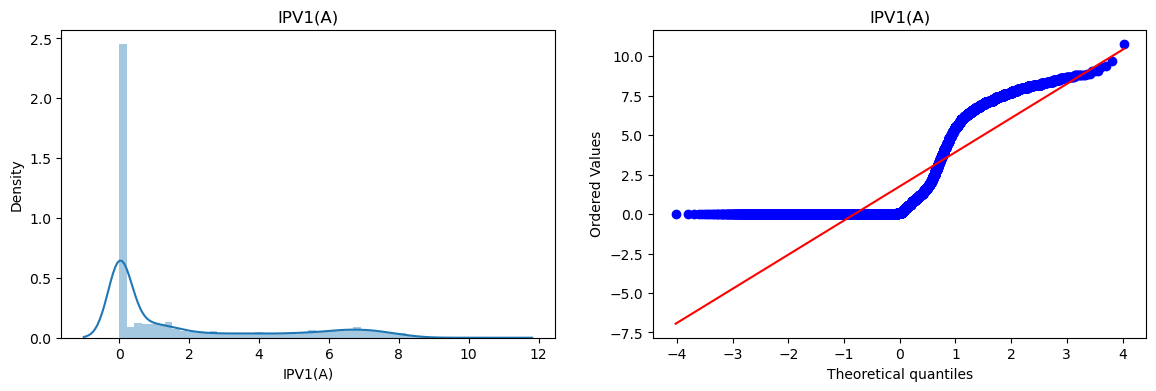

C:\Users\SR-19\AppData\Local\Temp\ipykernel_8060\2080111843.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


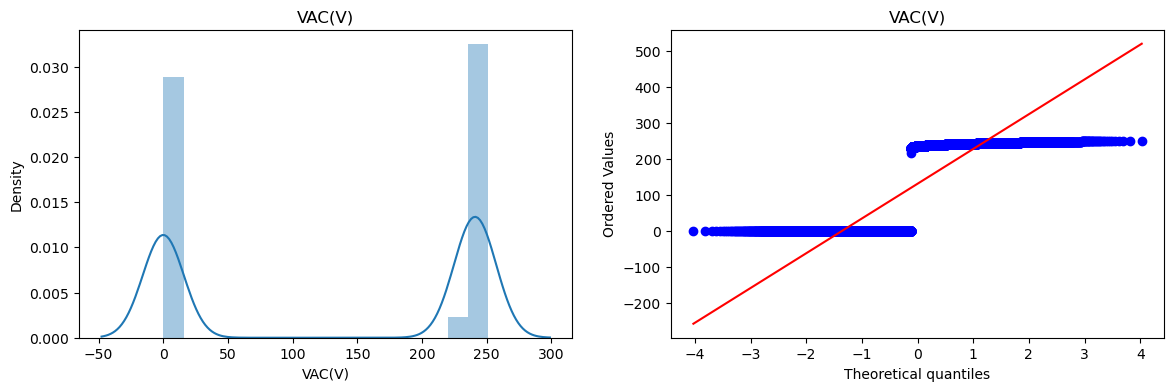

C:\Users\SR-19\AppData\Local\Temp\ipykernel_8060\2080111843.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


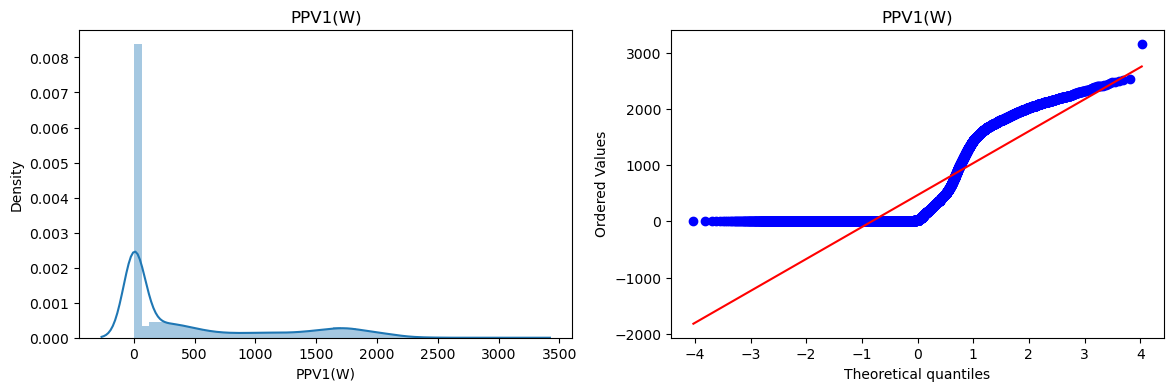

C:\Users\SR-19\AppData\Local\Temp\ipykernel_8060\2080111843.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


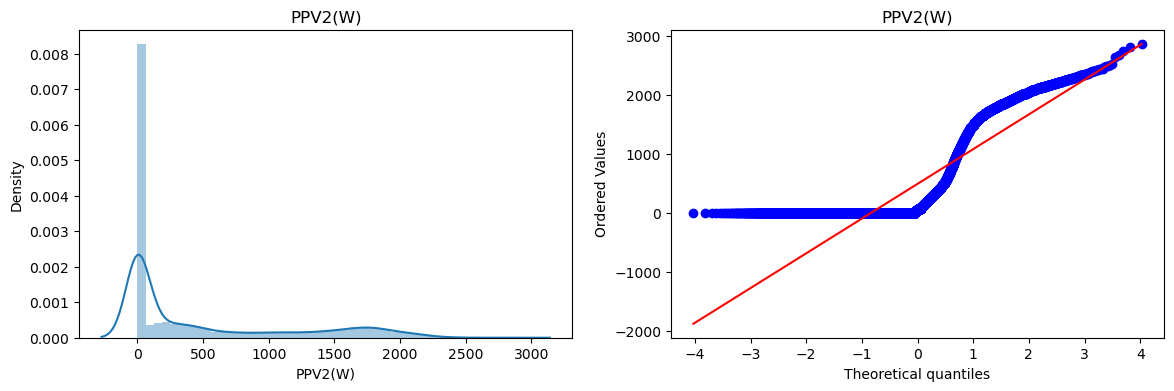

C:\Users\SR-19\AppData\Local\Temp\ipykernel_8060\2080111843.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


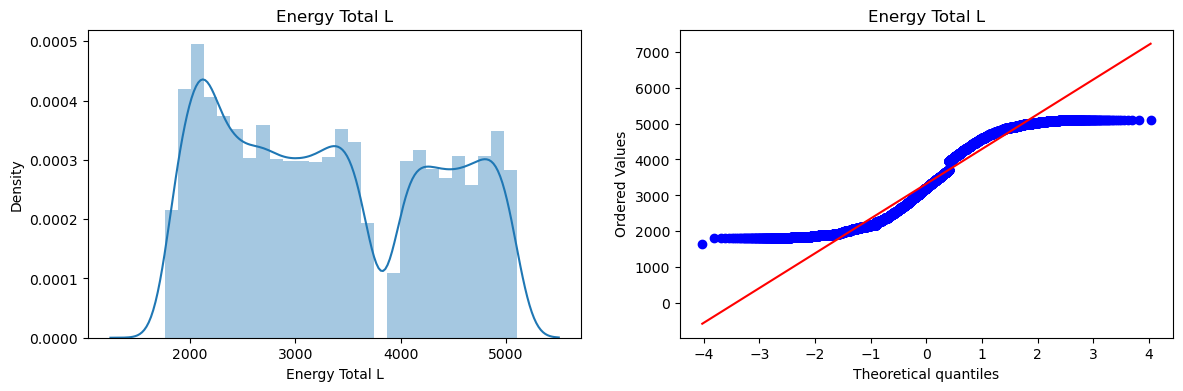

C:\Users\SR-19\AppData\Local\Temp\ipykernel_8060\2080111843.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


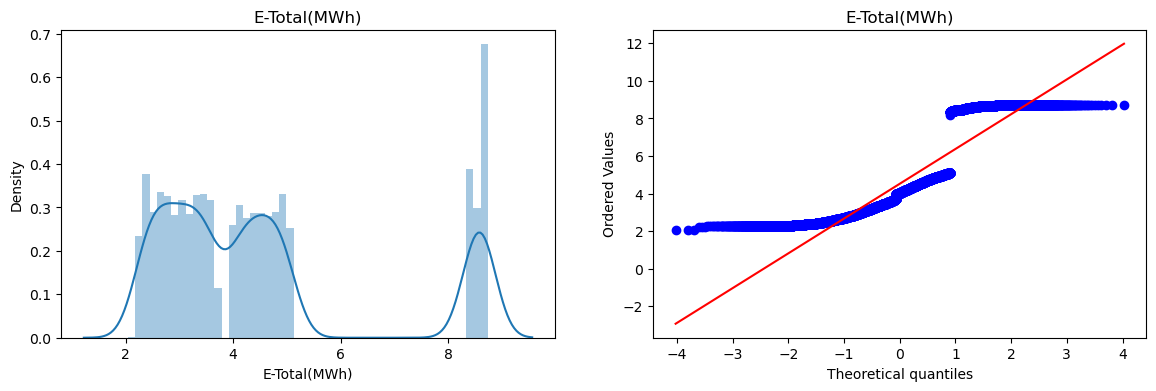

C:\Users\SR-19\AppData\Local\Temp\ipykernel_8060\2080111843.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


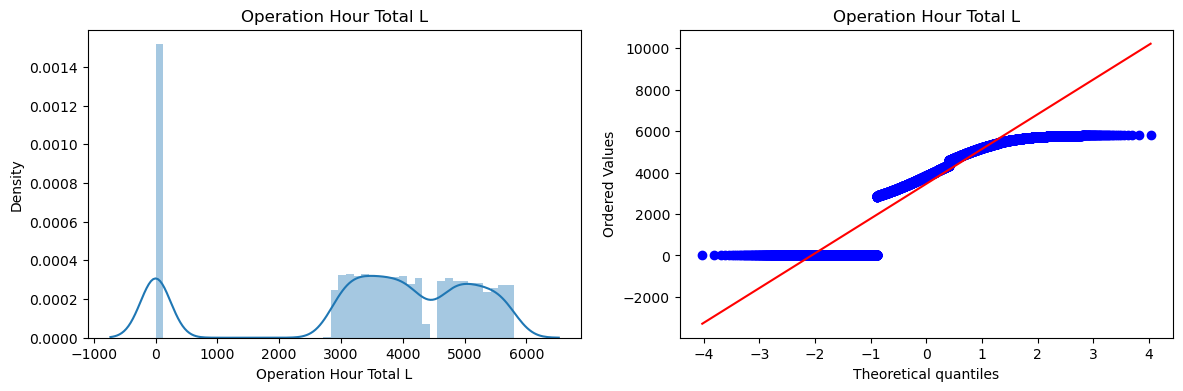

In [97]:
#check wther the column is normally distributed or not
for col in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)
    plt.subplot(122)
    stats.probplot(x_train[col],dist='norm',plot=plt)
    plt.title(col)
    plt.show()

In [25]:
for col in x_train.columns:
    print(x_train[col].skew())

0.6465192504326859
-0.14619369013322497
1.2433043096687642
-0.1855173930981377
1.215104424072533
1.1429789443316032
0.2039543973905132
1.1205701248148934
-0.9351934443088605


In [26]:
from sklearn.preprocessing import PowerTransformer
trf=PowerTransformer()
x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.transform(x_test)
x_train_trf=pd.DataFrame(x_train_trf,columns=x_train.columns)
x_test_trf=pd.DataFrame(x_test_trf,columns=x_test.columns)

In [27]:
x_train

Temperature(C)  VPV1(V)  IPV1(A)  VAC(V)  PPV1(W)  PPV2(W)  \
26680             4.6      0.0      0.0     0.0     0.00     0.00   
22364             4.6      0.0      0.0     0.0     0.00     0.00   
3704             71.0    249.6      6.4   239.4  1597.44  1619.80   
12522            43.0    282.2      0.8   242.0   225.76   252.72   
24273            29.4    323.6      0.1   242.0    32.36   111.60   
...               ...      ...      ...     ...      ...      ...   
29802            53.7    271.6      2.4   234.8   651.84   669.50   
5390              4.6      0.0      0.0     0.0     0.00     0.00   
860              55.8    267.0      5.3   243.0  1415.10  1456.00   
15795             4.6      0.0      0.0     0.0     0.00     0.00   
23654            42.5    278.2      6.5   243.8  1808.30  1820.00   

       Energy Total L  E-Total(MWh)  Operation Hour Total L  
26680          2121.5        8.6751                       0  
22364          2474.8        2.4748                    3130  
3704           4711.5        4.7115                    5325  
12522          3500.5        3.5005                    4136  
24273          2303.8        2.3038                    2941  
...               ...           ...                     ...  
29802          1884.3        8.4379                       0  
5390           4515.9        4.5159                    5128  
860            5001.6        5.0016                    5690  
15795          3167.6        3.1676                    3801  
23654          2349.9        2.3499                    3003  

[24478 rows x 9 columns]

In [28]:
x_train_trf

Temperature(C)   VPV1(V)   IPV1(A)    VAC(V)   PPV1(W)   PPV2(W)  \
0           -1.074185 -1.097272 -0.899781 -1.097813 -1.005016 -1.009278   
1           -1.074185 -1.097272 -0.899781 -1.097813 -1.005016 -1.009278   
2            1.317502  0.869279  1.473391  0.907695  1.229826  1.209766   
3            0.805008  0.926102  0.266984  0.912838  0.700545  0.698944   
4            0.437300  0.990313 -0.666403  0.912838  0.139505  0.465927   
...               ...       ...       ...       ...       ...       ...   
24473        1.028261  0.908304  0.997067  0.898472  0.992242  0.970224   
24474       -1.074185 -1.097272 -0.899781 -1.097813 -1.005016 -1.009278   
24475        1.067421  0.900385  1.400108  0.914803  1.198183  1.181192   
24476       -1.074185 -1.097272 -0.899781 -1.097813 -1.005016 -1.009278   
24477        0.793427  0.919458  1.479039  0.916370  1.262040  1.240896   

       Energy Total L  E-Total(MWh)  Operation Hour Total L  
0           -1.276950      1.606833               -2.012738  
1           -0.818615     -1.428194                0.075191  
2            1.305501      0.477097                0.814985  
3            0.281755     -0.303350                0.435442  
4           -1.033910     -1.688988                0.002158  
...               ...           ...                     ...  
24473       -1.617630      1.567456               -2.012738  
24474        1.154587      0.375759                0.754862  
24475        1.520966      0.614426                0.923885  
24476       -0.045453     -0.603691                0.320201  
24477       -0.974729     -1.615876                0.026335  

[24478 rows x 9 columns]

C:\Users\SR-19\AppData\Local\Temp\ipykernel_2484\2502575386.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trf[col])


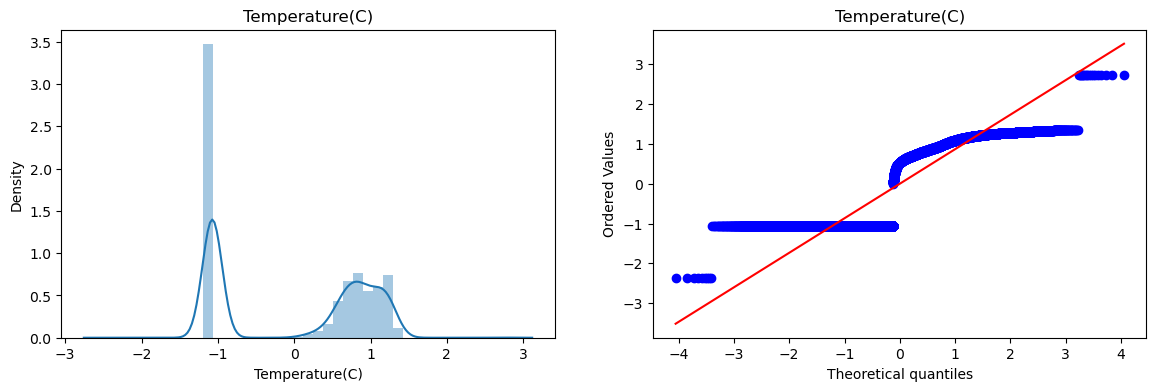

C:\Users\SR-19\AppData\Local\Temp\ipykernel_2484\2502575386.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trf[col])


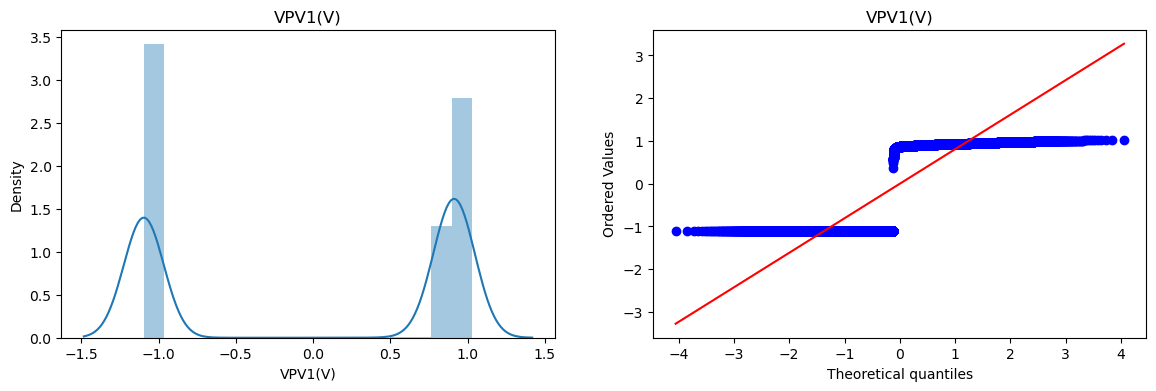

C:\Users\SR-19\AppData\Local\Temp\ipykernel_2484\2502575386.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trf[col])


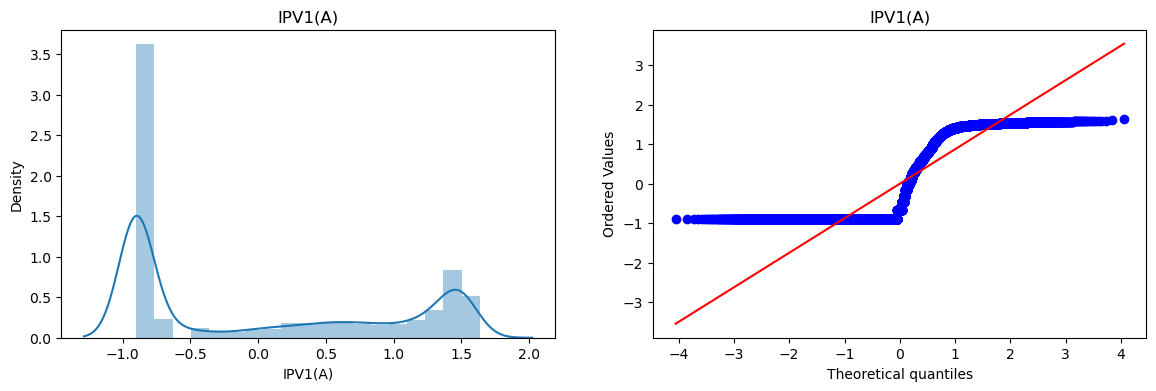

C:\Users\SR-19\AppData\Local\Temp\ipykernel_2484\2502575386.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trf[col])


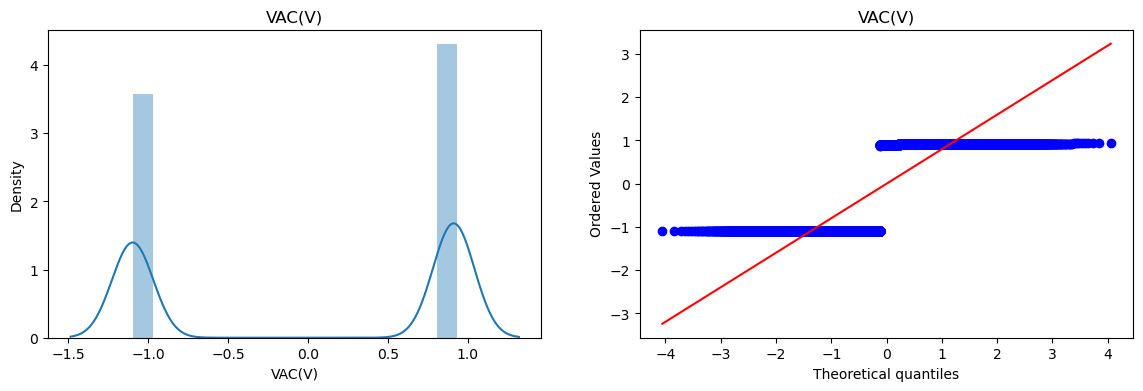

C:\Users\SR-19\AppData\Local\Temp\ipykernel_2484\2502575386.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trf[col])


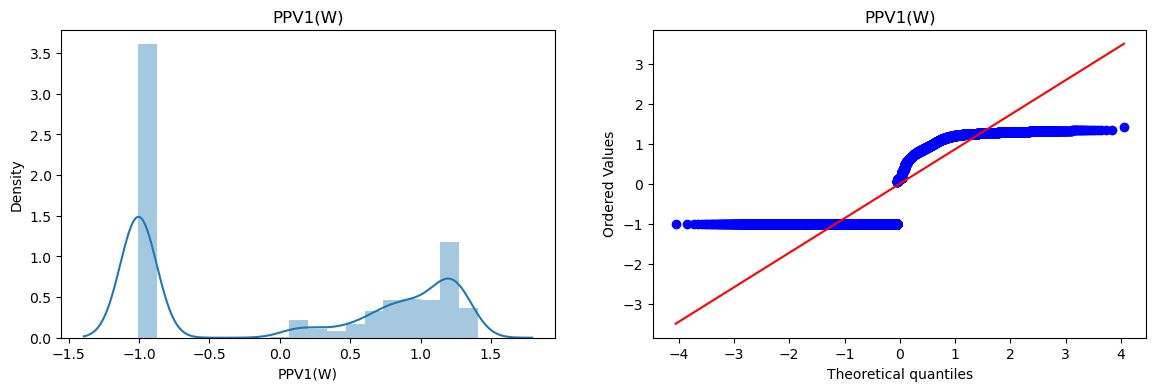

C:\Users\SR-19\AppData\Local\Temp\ipykernel_2484\2502575386.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trf[col])


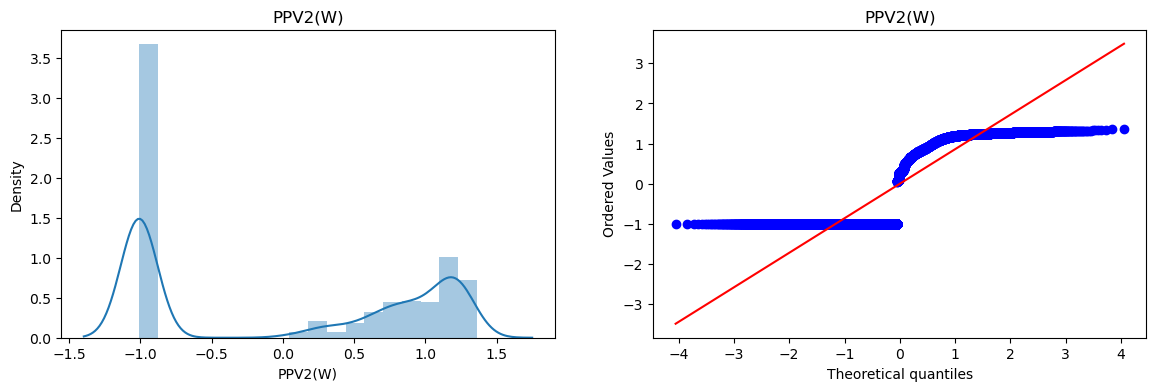

C:\Users\SR-19\AppData\Local\Temp\ipykernel_2484\2502575386.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trf[col])


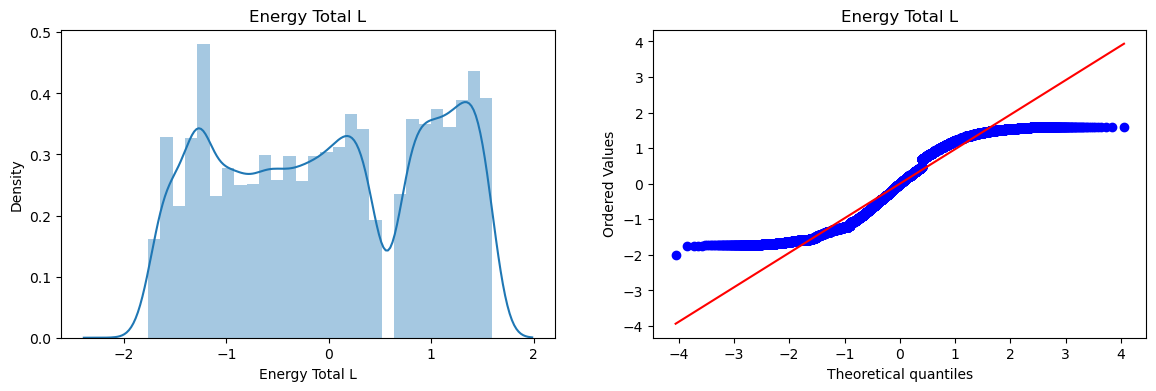

C:\Users\SR-19\AppData\Local\Temp\ipykernel_2484\2502575386.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trf[col])


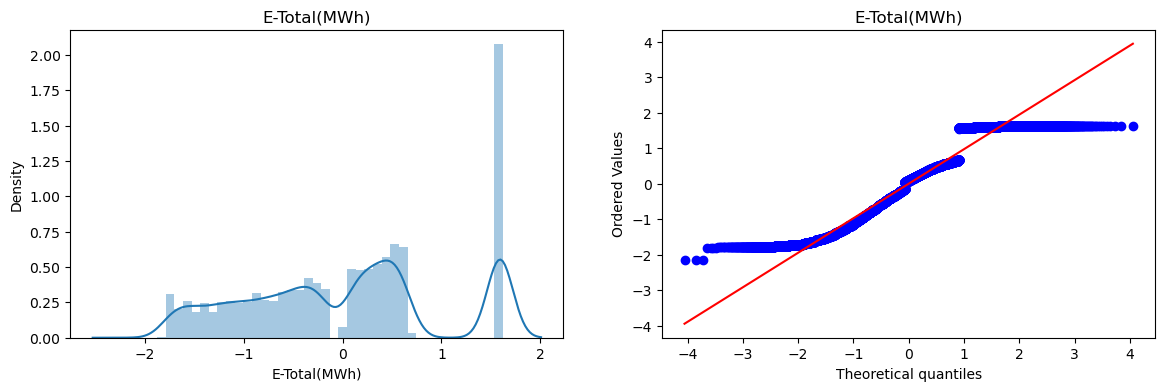

C:\Users\SR-19\AppData\Local\Temp\ipykernel_2484\2502575386.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trf[col])


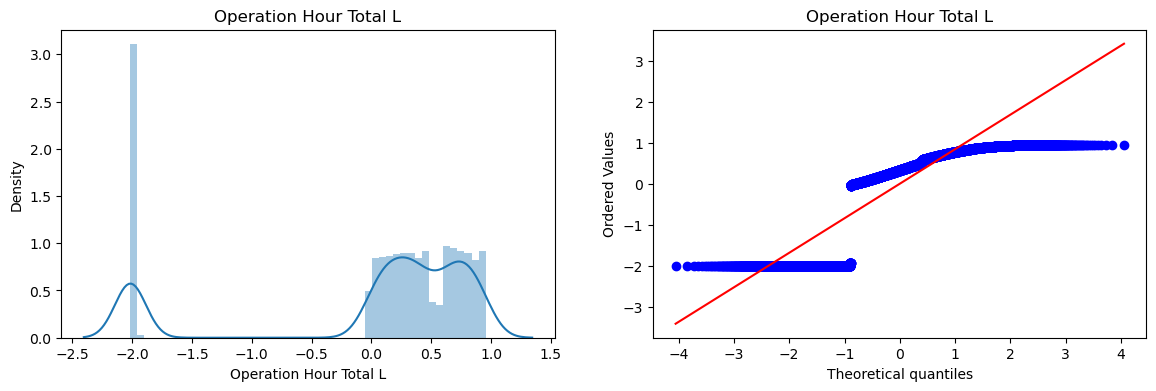

In [362]:
#check wther the column is normally distributed or not
for col in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train_trf[col])
    plt.title(col)
    plt.subplot(122)
    stats.probplot(x_train_trf[col],dist='norm',plot=plt)
    plt.title(col)
    plt.show()

In [29]:
for col in x_train_trf.columns:
    print(x_train_trf[col].skew())

-0.07031319319224481
-0.18429061335968547
0.4361344286135869
-0.18686809473474764
0.08057805240726083
0.06260703896729433
-0.034066087145818116
0.13036100610642695
-1.3451840196276963


In [30]:
#EDA PERFROMED UNDER PANDAS PROFILING
df1.shape

(30598, 10)

In [31]:
from sklearn.preprocessing import StandardScaler
s= StandardScaler()
x_train_scaled=s.fit_transform(x_train_trf)
x_test_scaled=s.transform(x_test_trf)
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [32]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [33]:
y_pred=lr.predict(x_test_scaled)
from sklearn.metrics import r2_score,mean_squared_error
score=r2_score(y_test,y_pred)
print("The accuracy of our model is {}%".format(score*100))

The accuracy of our model is 17.693713762915998%


In [34]:
np.sqrt(mean_squared_error(y_test,y_pred))

8.876223465096936

In [37]:
for importance, name in sorted(zip(dt.feature_importances_, x_train.columns), reverse=True):
    print(name,importance)

Operation Hour Total L 0.382117233674558
Temperature(C) 0.21899540374515025
E-Total(MWh) 0.13012253246764166
PPV1(W) 0.0919893299237603
Energy Total L 0.08163115777131845
VPV1(V) 0.03383647563086028
PPV2(W) 0.031254437823572706
VAC(V) 0.02292871488996155
IPV1(A) 0.007124714073176597


In [38]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train_scaled,y_train)

DecisionTreeRegressor()

In [39]:
y_pred2=dt.predict(x_test_scaled)
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred2)
print("The accuracy of our model is {}%".format(round(score,2)*100))

The accuracy of our model is 84.0%


In [40]:
np.sqrt(mean_squared_error(y_test,y_pred2))

3.942152218670753

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
rf= RandomForestRegressor()
rf.fit(x_train_scaled,y_train)

RandomForestRegressor()

In [43]:
y_pred3=rf.predict(x_test_scaled)
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred3)
print("The accuracy of our model is {}%".format(round(score,2)*100))

The accuracy of our model is 85.0%


In [44]:
np.sqrt(mean_squared_error(y_test,y_pred3))

3.763563200444422

In [45]:
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train_scaled,y_train)
y_pred4=knn.predict(x_test_scaled)
score=r2_score(y_test,y_pred4)
print("The accuracy of our model is {}%".format(round(score,2)*100))

The accuracy of our model is 81.0%


In [46]:
np.sqrt(mean_squared_error(y_test,y_pred4))

4.274280797754605

In [50]:
from sklearn.model_selection import GridSearchCV
n_estimators = [20,60,100,120]
max_features = [0.2,0.6,1.0]
max_depth = [2,8,None]
max_samples = [0.5,0.75,1.0]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)
rf = RandomForestRegressor()
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)


{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [47]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop =1000, num = 30)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv =3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train_scaled,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 227, 255, 282,
                                                         310, 337, 365, 393,
                                                         420, 448, 475, 503,
                                                         531, 558, 586, 613,
                                                         641, 668, 696, 724,
                                                         751, 779, 806, 834,
                                                         862, 889, 917, 944,
                                                         972, 1000]},
                   random_state=42, verbose=2)

In [54]:
rf_grid.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [55]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 1.0,
 'n_estimators': 100}

In [57]:
rf_grid.best_score_

0.8490574349296633

In [48]:
rf_random.best_params_

{'n_estimators': 310,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [49]:
rf_random.best_score_

0.8420765780926619

In [51]:
y_test.shape

(6120,)

In [52]:
y_test= y_test.values.reshape(1,6120)

In [53]:
y_pred=pd.DataFrame(y_pred)

In [54]:
cross_checking = pd.DataFrame({'Actual' : y_test.flatten() , 'Predicted' : y_pred3.flatten()})
cross_checking

Actual  Predicted
0       5.82   4.895400
1      20.57  20.701400
2      18.30  16.925000
3      20.96  21.669700
4       8.66   3.155269
...      ...        ...
6115    0.00   0.000000
6116   10.27  12.585100
6117   19.39  19.479500
6118   21.80  21.800000
6119    0.25   0.272300

[6120 rows x 2 columns]

In [55]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking

Actual  Predicted         Error
0       5.82   4.895400  9.246000e-01
1      20.57  20.701400 -1.314000e-01
2      18.30  16.925000  1.375000e+00
3      20.96  21.669700 -7.097000e-01
4       8.66   3.155269  5.504731e+00
...      ...        ...           ...
6115    0.00   0.000000  0.000000e+00
6116   10.27  12.585100 -2.315100e+00
6117   19.39  19.479500 -8.950000e-02
6118   21.80  21.800000  1.776357e-14
6119    0.25   0.272300 -2.230000e-02

[6120 rows x 3 columns]

In [57]:
cross_checking_final  = cross_checking[cross_checking['Error'] >= 2]
cross_checking_final.sample(50).style.background_gradient(cmap='coolwarm').set_properties(**{'font-family': 'Lucida Calligraphy','color': 'LigntGreen','font-size': '15px'})

In [58]:
cross_checking_final

Actual  Predicted      Error
4       8.66   3.155269   5.504731
23     23.48   5.103223  18.376777
61     15.57   8.343600   7.226400
78     19.87  17.172900   2.697100
92     16.06  13.330000   2.730000
...      ...        ...        ...
6079   25.51   6.287680  19.222320
6098   20.69  16.470700   4.219300
6099   23.12  17.812300   5.307700
6104   23.52  20.722000   2.798000
6113   25.41  22.229200   3.180800

[527 rows x 3 columns]

In [ ]:
#max accuracy=85% by random forest

In [60]:
(525/6120)*100

8.57843137254902